# Procesamiento digital de señales de Electromiograma

## 1. Introducción

### 1.1 EMG 

Un electromiograma permite registrar la actividad eléctrica que se produce en el músculo esquelético durante su contracción. Su realización permite evaluar la salud de los musculos y células nerviosas que los controlan. Por lo tanto, este tipo de pruebas pueden revelar disfunción nerviosa o del músculo.

La contracción muscular inicia ocn la llegada del potencial de acción desde neuronas motoras, que al alcanzar la unión neuromuscular, desencadena una serie de eventos eléctricos y mecánicos en la fibra muscular. Esta actividad eléctrica puede captarse y medirse mediante una electromiografía, que permite analizar la dinámica de activación neuromuscular.

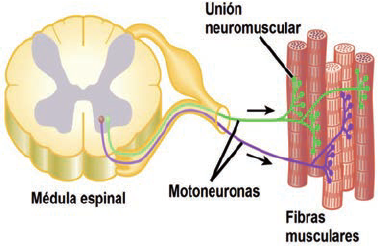

*Figura 1 Representación de una unidad motora*

En estado de reposo, la membrana de tanto las células nerviosas como las musculares posee una polaridad, que se atribuye a la diferencia de concentraciones de iones entre el medio extra e intracelular. Al recibir un estímulo nervioso, la fibra muscular se despolariza y la señal se propaga a lo largo de su membrana, lo que produce una contracción. Dicha despolarización implica un movimiento de corrientes iónicas, que genera un campo eléctrico local registrable por un electrodo.

Una señal de EMG representa una superposición de potenciales de acción de unidades motoras que, si bien parece aleatoria, puede ser modelada como un proceso de impulsos que producen una respuesta.
Esto se puede describir mediante el siguiente modelo matemático:

$ x(n) = \sum_{r=0}^{N-1} h(r)*e(n-r) + w(n) $

Donde:
$x(n)$ es la señal total del EMG. $e(n)$ representa los impulsos neuronales, disparos de una motoneurona. $h(r)$ es la respuesta del músculo al impulso (MUAP). $w(n)$ es el ruido.
No obstante, la señal de EMG presenta diversos desafíos en cuanto a su adquisición, entre los cuales se encuentran el ruido eléctrico, las interferencias electromagnéticas, artefactos de movimiento, variabilidad fisiológica de la señal. A su vez, existen factores fisiológicos que afectan la forma y amplitud, siendo estos la ubicación de los electrodos, el tipo de fibra muscular, la cantidad de unidades motoras activas, entre otros.

La adquisición de señales electromiográficas y su análisis permite estudiar el funcionamiento del sistema neuromuscular, así como también detectar posibles patologías. 

### 1.2  EMG normal

En un EMG normal, los músculos y nervios funcionan correctamente, por lo tanto el músculo en reposo no debe mostrar actividad eléctrica significativa. Si se produce una contracción débil, se da un reclutamiento de unidades motoras, la amplitud de la onda representa el número de fibras musculares en la unidad motora. A medida que se incrementa la intesidad de la contracción, aumentan tanto la frecuencia de impulsos que arrivan a la unidad motora como el numero de unidades motoras que se contraen, esto produce una señal con mucho interferencia y superposición, esto se debe a muchas unidades motoras que se contraen en simultáneo.

### 1.3 Patologías
Una unidad motora se compone de una neurona que inerva a fibras musculares. Por lo que pueden detectarse patologías relacionadas al mal funcionamiento de la neurona o del músculo.

En un paciente con neuropatía, el número de unidades motoras es menor al normal debido a daño en motoneuronas o sus axones.  Esta patología resulta en una disminución del número de potenciales de acción registrados, no obstante, las unidades motoras que sobreviven suelen sufrir una hipertrofia compensatoria. Esto implica que se generan MUAPs de mayor amplitud y duración en comparación a lo esperable para un paciente sano. A su vez, en este tipo de señales se suelen observar contracciones involuntarias en reposo. 

En un paciente con miopatía, es el músculo el que deteriora su capacidad contráctil. Si bien se produce un control nervioso correcto, las unidades motoras contienen menos fibras musculares funcionales. Estas condiciones se traducen en una señal con MUAPs de baja amplitud y corta duración. Es esperable ver menor energía y actividad menos densa incluso cuando el paciente contrae voluntariamente. En cuanto a la frecuencia de actividad, puede llegar a ser más alta para compensar la debilidad muscular.
 
El objetivo del presente trabajo es explorar diversos métodos y técnicas de procesamiento digital de señales fisiológicas reales. Para lograr caracterizar y comparar señales musculares de sujetos sanos y con patologías.




## 2. Metodología

### 2.1 Señales

El presente trabajo analiza señales de EMG registradas en el músculo tibial anterior de tres sujetos con diferentes condiciones neuromusculares. Los datos se recolectaron a través de un electrodo concéntrico con aguja de 25 mm insertado en el músculo. A cada uno de los pacientes se le pidió realizar una dorsiflexión suave del pie contra una resistencia, posicionando el electrodo hasta identificar potenciales de unidades motoras con tiempo de ascenso rápido. Luego, se procedió el muestreo durante varios segundos de señal, antes de retirar la aguja, los sujetos relajaron el músculo.
Las señales fueron inicialmente adquiridas a 50kHz y remuestreadas a 4kHz. Se aplicaron además dos filtros pasa altos de 20 Hz y un pasa bajos de 5kHz. Las tres señales adquiridas corresponden a:
1. Un hombre de 44 años sin antecedentes de enfermedad neuromuscular.
2. Hombre de 62 años con dolor lumbar crónico y neuropatía por radiculopatía L5 derecha.
3. Hombre de 57 años con miopatía secundaria a polimiositis crónica, medicada con esteroides y bajas dosis de metotrexato.

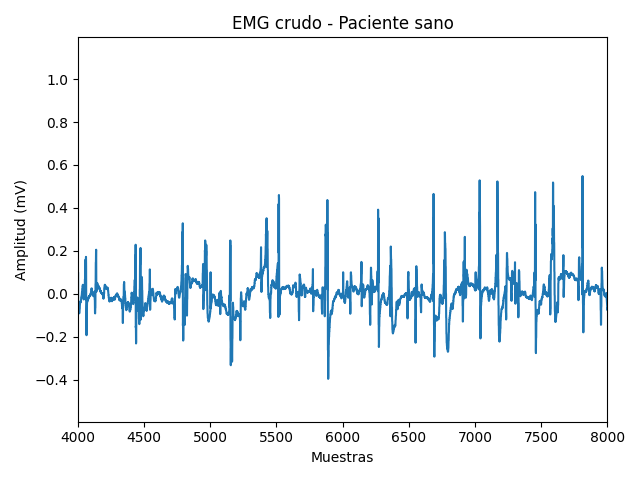
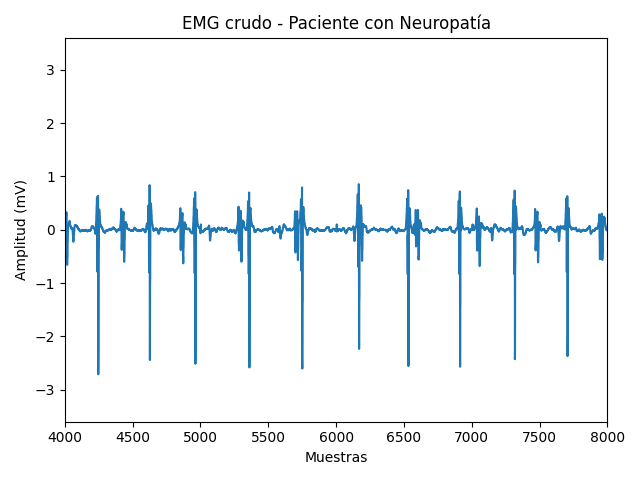
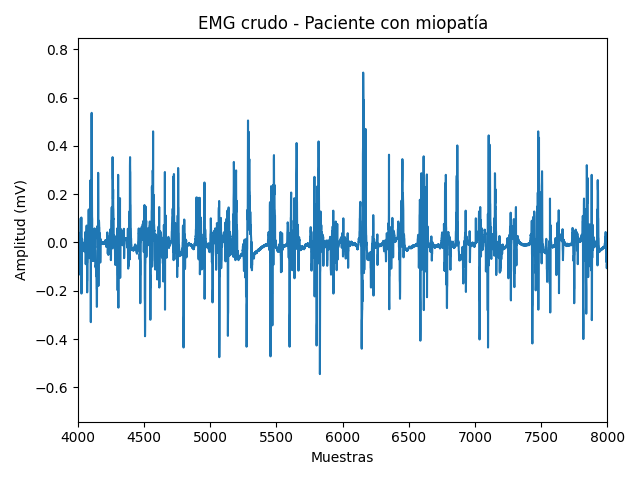


### 2.2 Preprocesamiento

#### 2.2.1 Filtrado

##### Filtrado Lineal

Si bien las señales ya pasaron por etapas de prefiltrado analógico, es conveniente aplicar filtros digitales para refinar el acondicionamiento de las señales y limitar los rangos de frecuencias a un rango fisiológicamente relevante.

La actividad eléctrica muscular se encuentra mayormento concentrada entre 20 y 500 Hz. Las frecuencias más bajas pueden deberse a movimientos, mientras que las superiores suelen representar interferencia o ruido eléctrico. El acondicionamiento adicional por medio de la implementación de filtros digitales resulta beneficioso, pues mejora la relación señal a ruido y permite refinar las bandas de paso y rechazo con mayor precisión.

##### Plantilla de diseño 

##### - Filtros Pasa Bandas
Para filtrar las señales de EMG, se diseñaron dos filtros de tipo IIR recursivos pasa banda. Ambos poseen una respuesta suave, que atenúa las componentes fuera del rango de 20 a 480 Hz. Se estableció una banda de rechazo por debajo de 10 Hz para suprimir artefatos debido al movimiento y una banda de rechazo en 600 Hz para eliminar componentes no fisiológicas. La ondulación máxima permitida en la banda pasante fue de 0.5 dB, y la atenuación mínima de 40dB en las bandas de rechazo. Los parámetros aseguran una buena fidelidad sin introducir distorsiones en la información relevante de la señal.

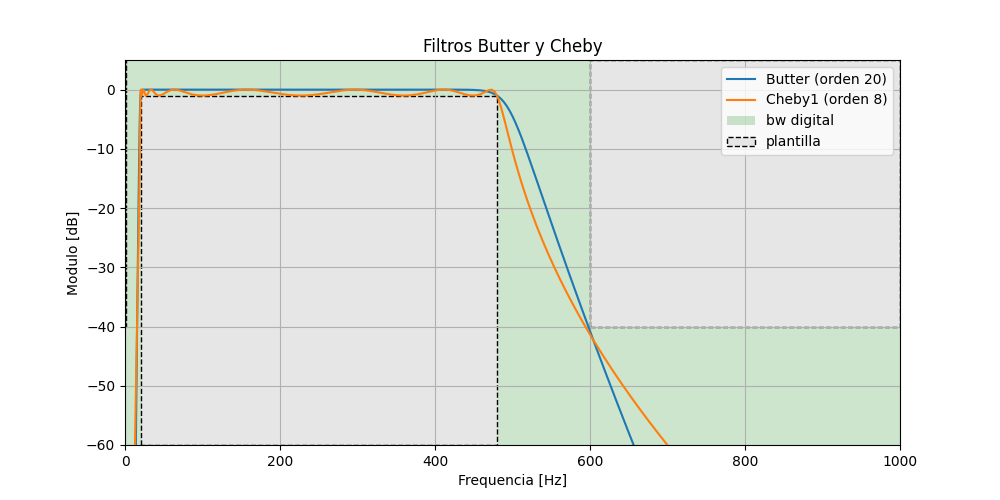

Se probaron dos diseños posibles, un filtro de tipo Butterwoth y un Chebyshev tipo I. Si bien el segundo cumple con los requerimientos con un orden menor, introduce ripple en la banda pasante, por lo que se concluyó que el filtro de Butterworth (al costo de un mayor esfuerzo computacional) es una mejor opción para filtrar las señales ya que su respuesta monótona en la banda de paso introduce ondulaciones en la señal en el rango frecuencial de interés. 

##### - Filtros Notch
Además, para eliminar la interferencia eléctrica, se diseñó un filtro notch con corte en 60 Hz. Se probó la implementación de múltiples etapas en cascada para alcanzar órdenes superiores. 

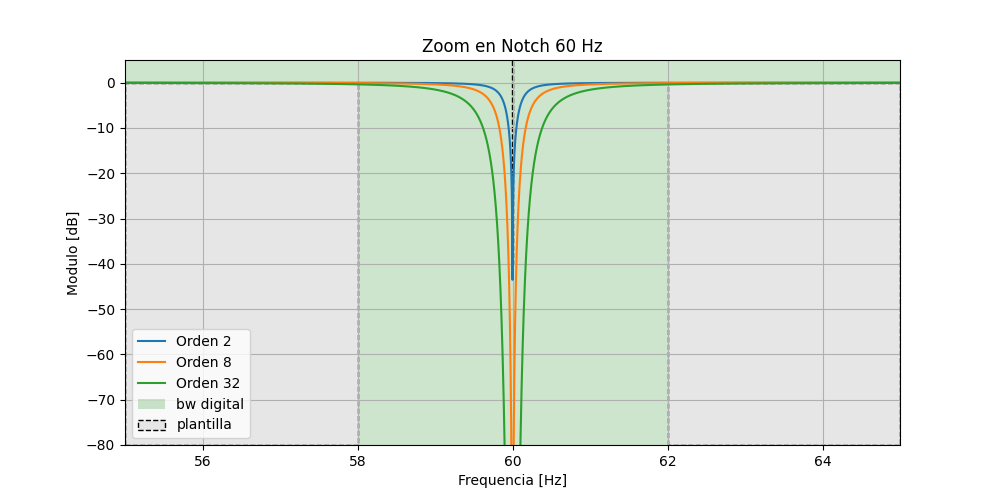

La plantilla permite ver que un orden 2  logra cumplir con los requerimientos de atenuación y transiciona en forma más abrupta.

##### - Filtros Concatenados

A continuación, se concatenaron las secciones SOS del filtro pasabanda Butterworth y el filtro notch de orden 2.

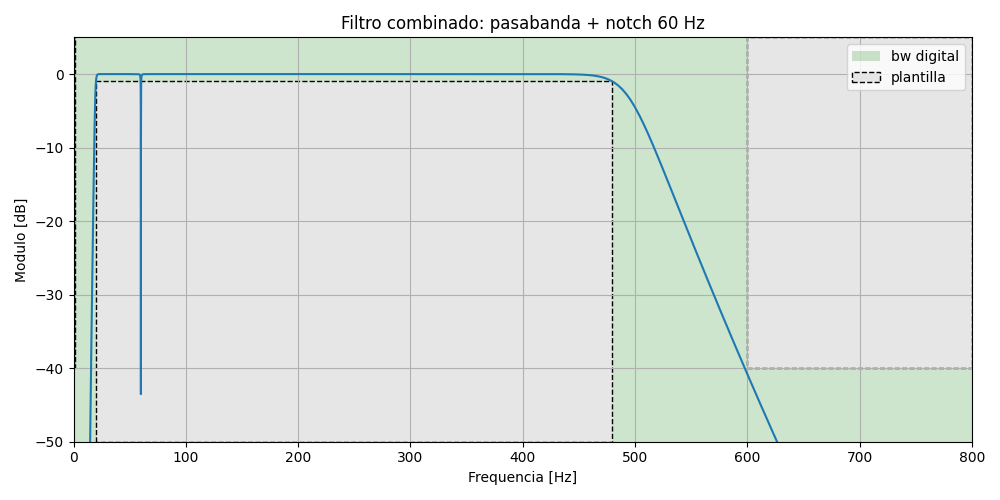

Como se logra apreciar en la figura, el filtro diseñado atenúa las regiones que están por fuera del rango de frecuencias de interés a -40dB. Asimismo, la elección del pasabandas butter logra una transferencia sin rizado en la banda pasante. 


##### Aplicación del Filtro Diseñado

Para implementar el filtro, se utiliza la función sosfiltfilt, que aplica el filtro diseñado dos veces. Primero hacia adelante, y luego hacia atrás. La técnica de filtrado bidireccional compensa la distorsión de fase introducida. Como resultado, el retardo es nulo y la señal no se distorsiona. 
Tras diseñar e implementar el filtro digital, se graficó la señal original y filtrada en intervalos de mayor y menor ruido, observándose que la señal filtrada conserva la forma de onda original relativamente bien, pero queda removida su línea de base, a su vez, se ve una reducción en la amplitud de los picos. Por otro lado, se introudce un leve rizado en áreas específicas.


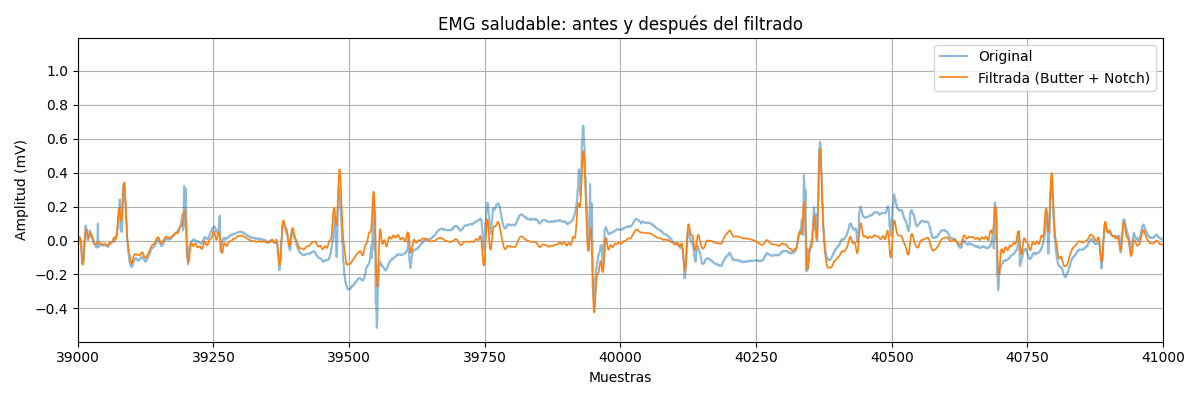
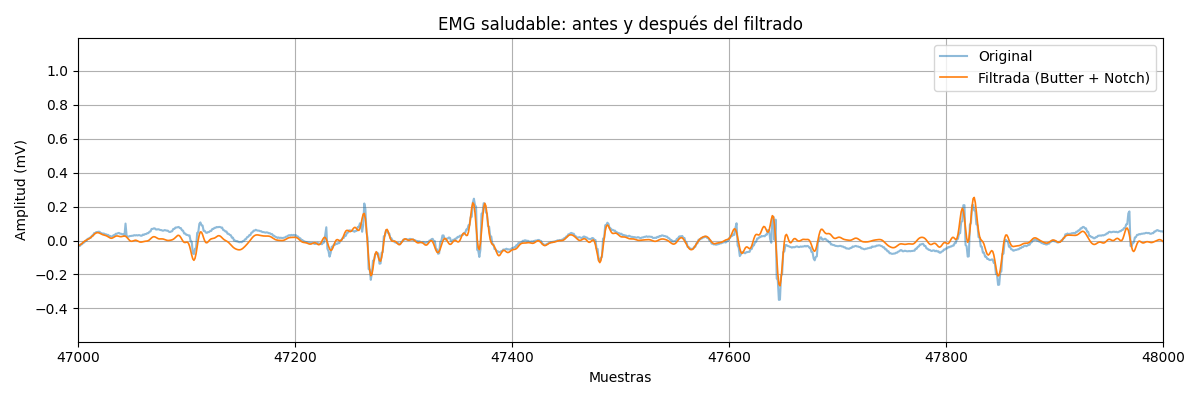

En cuanto a los resultados sobre la señal saludable, se aprecia que en la región ruidosa, la señal filtrada queda removida de su línea de base, sin embargo, el filtro diseñado introduce rizado no deseado en ciertas áreas, lo cual no es deseable para el análisis de señales fisiológicas, pues se distorsiona la forma original de la señal. En adición, se observa una reducción de la amplitud de los picos.

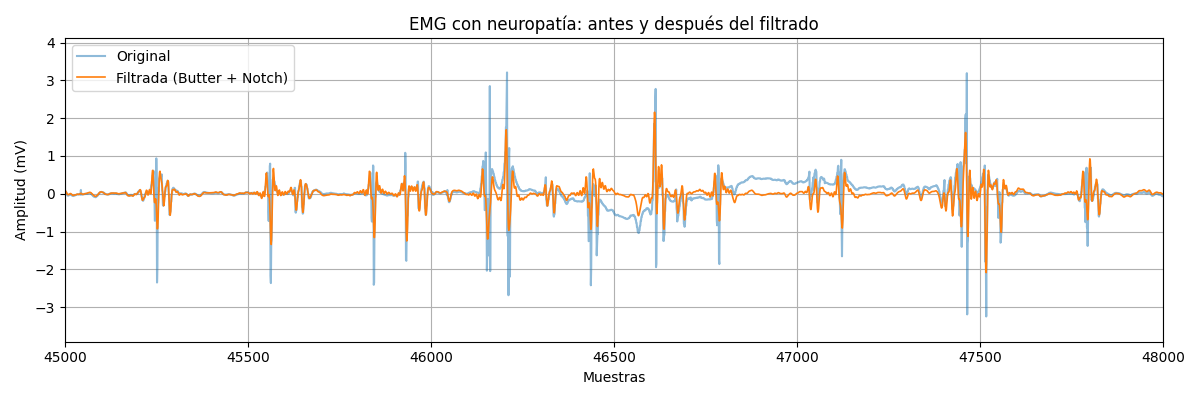
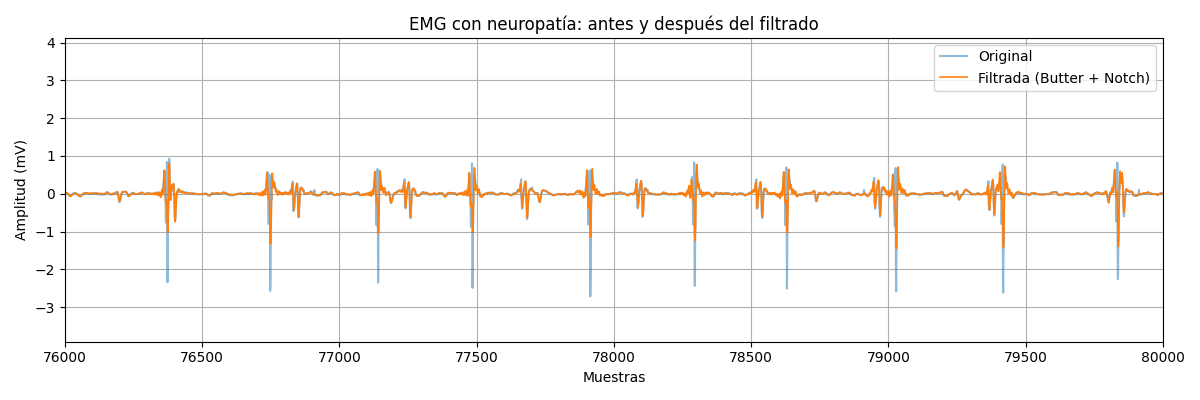

Para la señal con nueuropatía, la forma de onda original se conserva relativamente bien. El filtro remueve la línea de base, elimina oscilaciones muy rápidas y reduce la amplitud de picos abruptos.

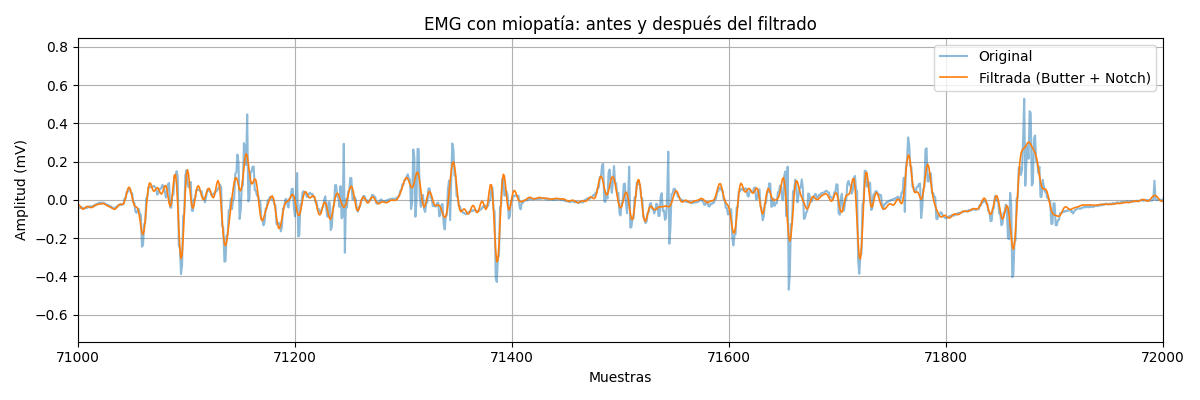
!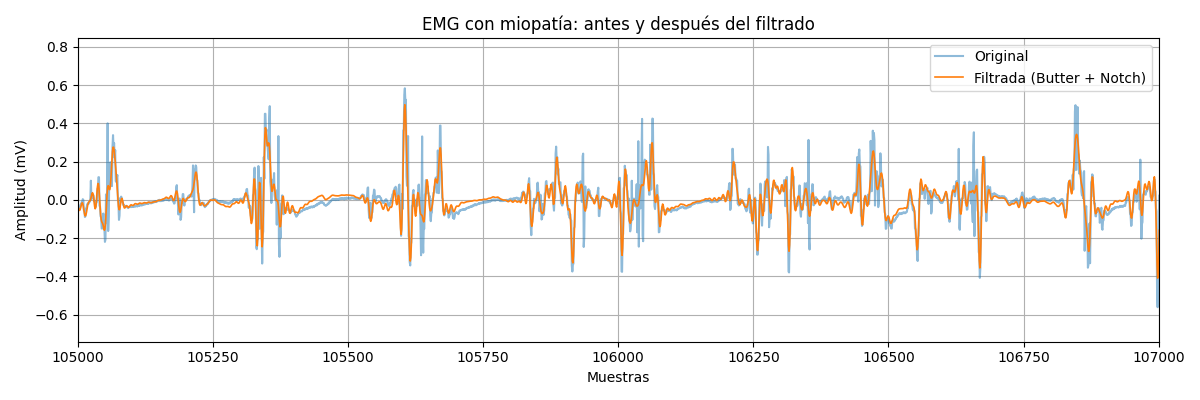

En cuanto a la señal correspondiente al paciente con miopatía, se observa que la señal filtrada resulta más limpia, se atenúan las oscilaciones abruptas y se observa una ligera disminución de la amplitud, a su vez, el filtrado introduce rizado.

##### Filtrado no Lineal
Asimismo, se decibió explorar métodos de filtrado no lineal para comparar los resultados con los del método lineal. 
Si se considera a la señal adquirida cruda como una suma entre ruido y la señal limpia, puede contruirse un filtro basado en la estimación de la señal de ruido. 
Para estimar la señal de ruido, se comenzó por utilizar la función find_peaks SciPy sobre la señal en crudo. 

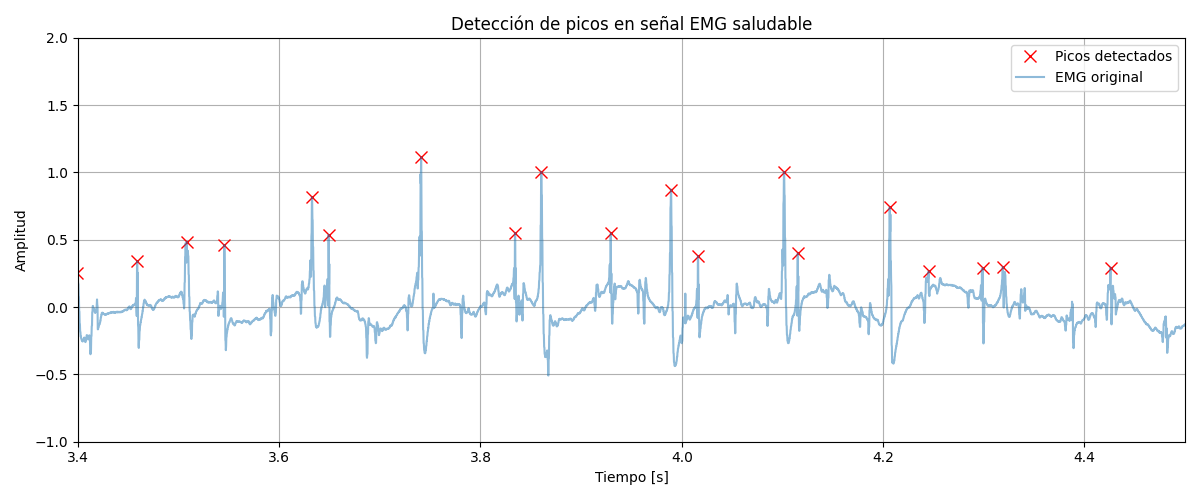

Por inspección visual, se determinó que aproximadamente 3 ms antes de cada pico, la señal debería tener un nivel isoeléctrico nulo. Teniendo esto en consideración, se decidió implementar la técnica de splines para estimar la línea de base interpolando los valores de la señal 3 ms antes de los picos detectados. 

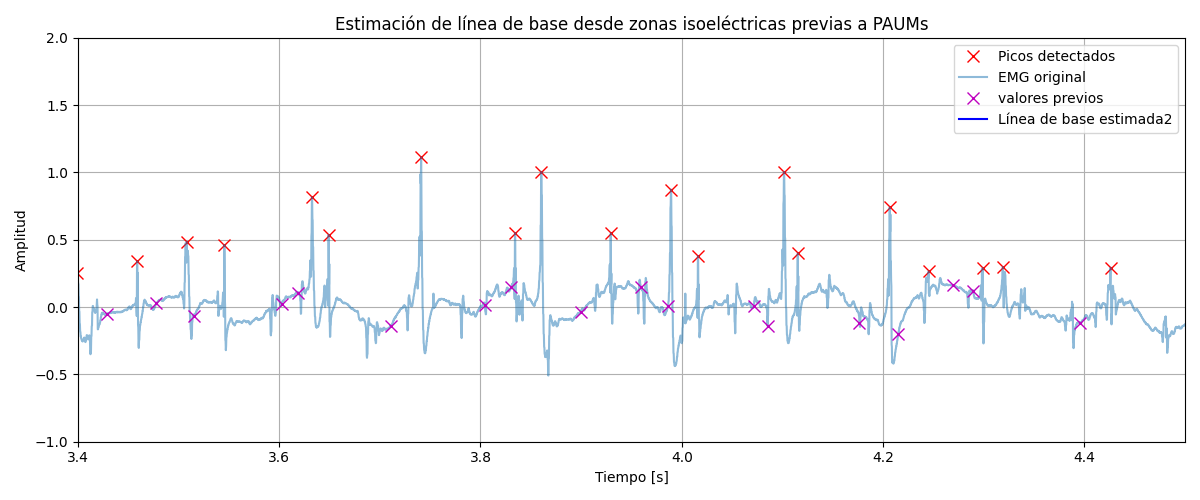

Dado que la frecuencia de los picos es variable, se decidió mejorar la técnica estimando el valor en el punto medio entre dos picos consecutivos, además, en lugar de evaluar directamente en la señal, se tomaron como valor el promedio y la mediana en una ventana de largo proporcional a la distancia entre picos.

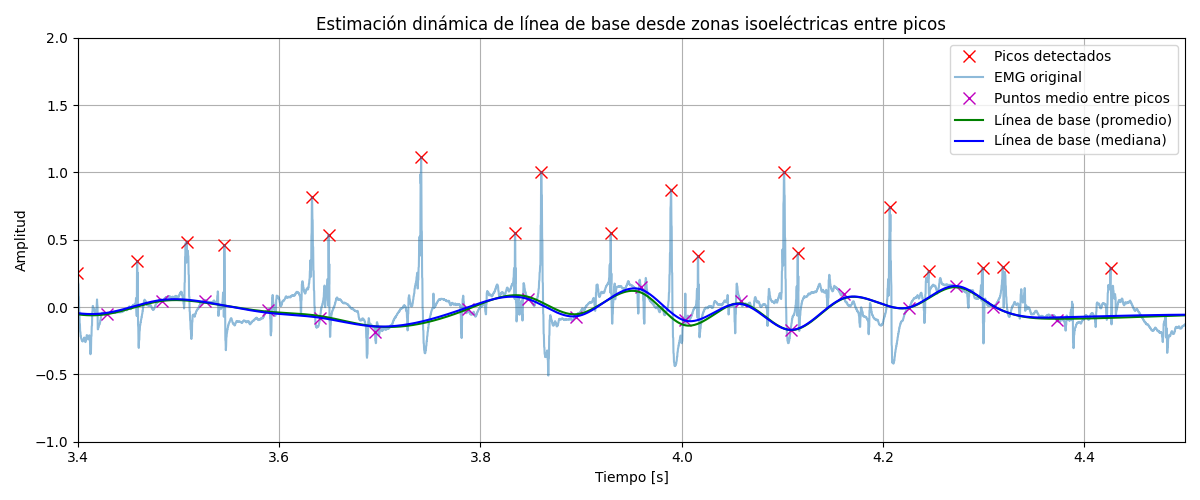

A su vez, se incorporaron más valores a la interpolación, cuyo valor se calculó como la mediana en un intervalo proporcional al largo de la ventana. Se prefirió el método de tomar la mediana por sobre el promedio porque tiene mayor robustez ante oscilaciones por ruido de alta frecuencia.

Por último, se restó la línea de base estimada a la señal original, esto resultó en una señal de media casi nula pero que conserva perfectamente su forma y la amplitud de sus picos.

A su vez, se probó un filtrado de mediana, este tipo de filtro tiene como fin la supresión de valores atípicos sin introducir distorsión en los bordes. Para su implementación, se definió una ventana de 5 ms, adecuada para eliminar ruido de baja frecuencia sin afectar eventos fisiológicos de larga duración.

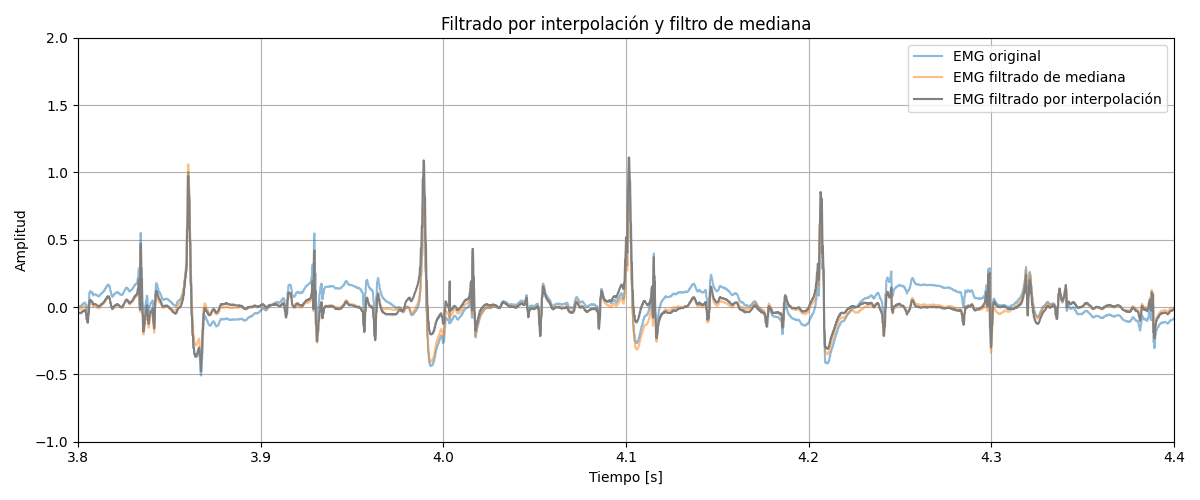
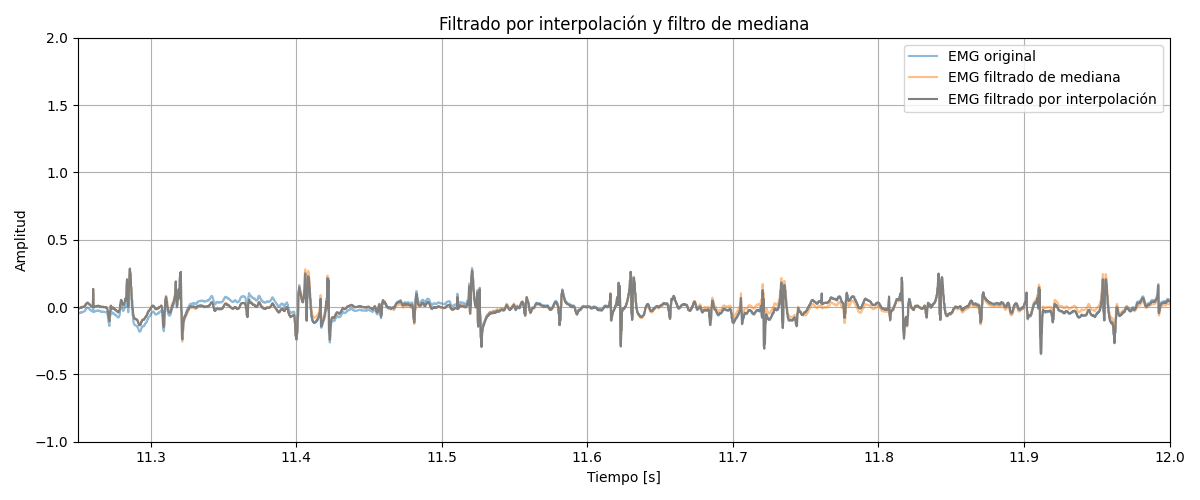

Como se logra apreciar, tanto el filtro de mediana como el filtro por interpolación logran remover la línea de base sin introducir rizado o cambiar la forma de la señal original. Asimismo, la amplitud de los picos se conserva.

##### Comparación de filtros

Para corroborar el comportamiento de los filtros, se estimó la densidad espectral de potencial por el método de welch sobre la señal saludable. Esta técnica se incorporó mediante la función welch de SciPy, que a diferencia del periodograma, utiliza segmentos que se superponen y estima la PSD realizando un promedio en cada uno.

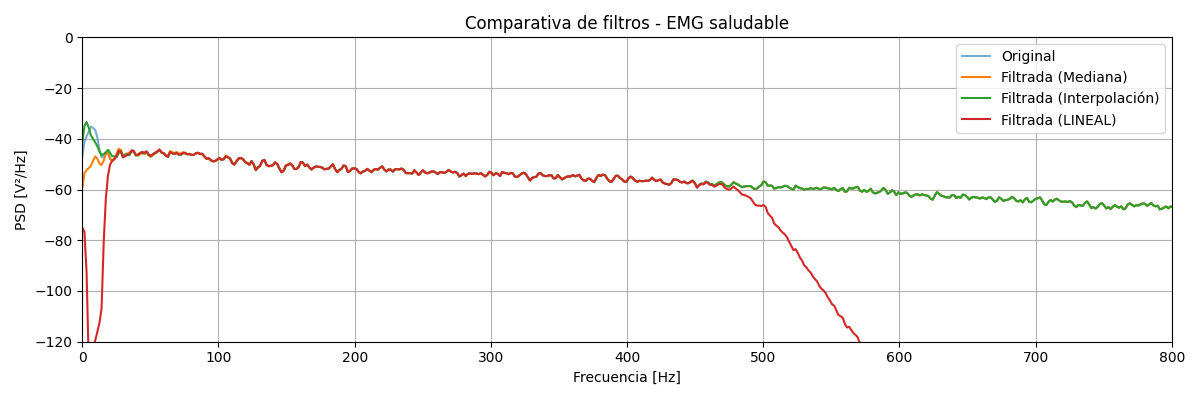

La figura permite comparar la información espectral de la señal original del paciente saludable luego de pasar por los distintos filtros diseñados. En cuanto al filtrado no lineal, el filtro por interpolación no suprime las frecuencias entre 0 y 20 Hz, mientras que el filtro de mediana sí. Por otro lado, el filtrado no lineal permite una atenuación muy por encima de los requerimientos necesarios, a su vez, logra atenuar componentes de alta frecuencia.

Cabe destacar, que el gráfico de PSD permitió dar cuenta de que el filtro notch era innecesario, pues no parece haber interferencias por red eléctrica afectando la señal.

##### Filtro Wavelet
Tras observar los resultados temporales y en frecuencia, se decidió incorporar un diseño nuevo de filtro a través de la descomposición de la señal por *Wavelets* (onditas). Para ello, se implementó la Transformada Wavelet Discreta a través de la función wavedec, que descompone la señal en niveles de detalle. Cada nivel representa un rango de frecuencias. Tras descomponer la señal, se utilizó waverec para reconstruir la señal pero esta vez dejando afuera los niveles de frecuencia no deseados. 

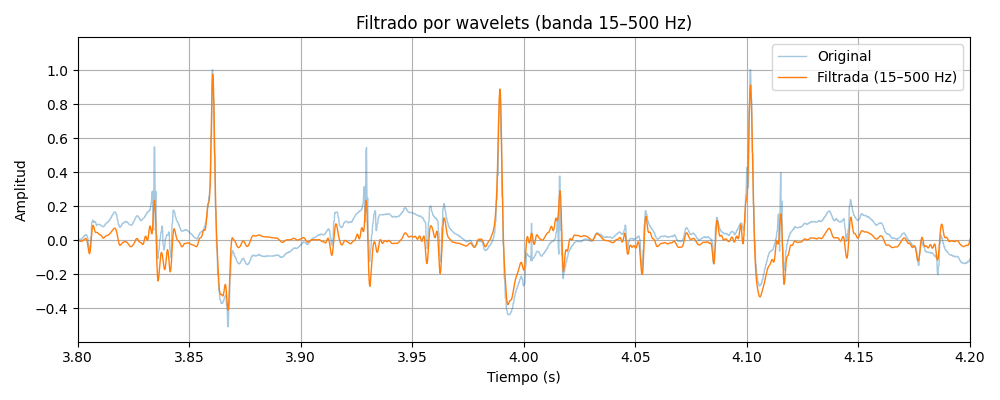

La visualización temporal de la señal original y la señal luego de atravesar el filtro wavelet muestra resultados que combinan buena remoción de línea de base (frecuencias bajas) y preservación de la forma de onda y amplitud de picos. Cabe destacar que se probaron diversas onditas madre, para seleccionar 'dmey', que resulta en una atenuación mejor de frecuencias altas.

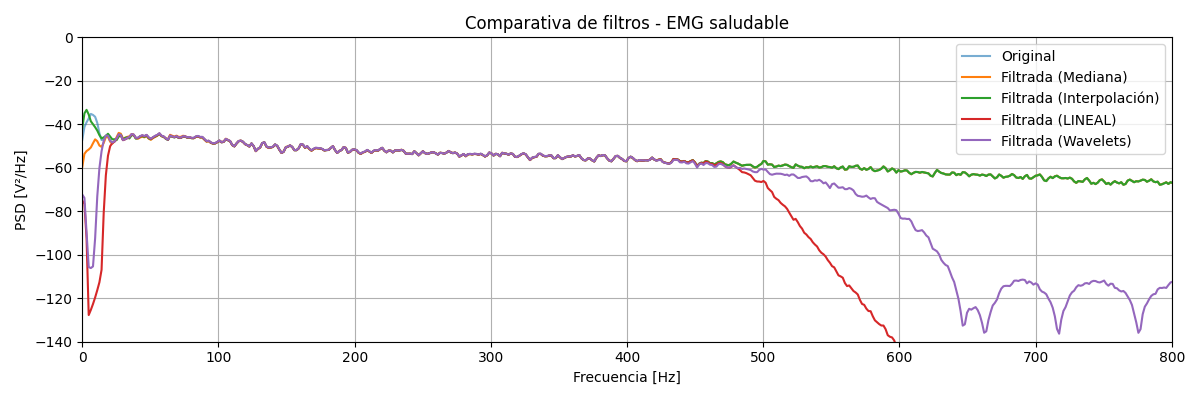

Se incorporó la señal filtrada mediante el método de onditas a la estimación de PSD. Esto permite visualizar que, si bien no produce una transición tan abrupta y atenuación tan buena como el filtro de Butterworth, la atenuación es aceptable (aproximadamente de 40dB).

##### Filtro Final

Tras probar todos los filtros, se decidió que el más adecuado para filtrar las señales de electromiografía es el que se diseñado por el **método de onditas**. Esto se debe a su diseño simple pero robusto y facilmente adaptable. Asimismo, ofrece buena atenuación de las bandas por buena de la región frecuencial de interés sin comprometer la forma de onda de la señal original. No obstante, a lo alrgo del trabajo se utilzaron diversos métodos de filtrado según la conveniencia.


#### 2.2.2 Rectificación de señales y envolventes

  
Al procesar una señal de EMG, se consideran (comúnmente) sus valores positivos pues estos reflejan la magnitud de la actividad independientemente de la dirección del potencial eléctrico. En este contexto, se puede realizar una rectificación de onda completa o de media onda. En el caso de la onda completa, se toma el valor absoluto de cada punto, además, se resta el valor medio para eliminar posibles componentes de continua que pueden distorsionar análisis posteriores.
Además, en el procesamiento de señales de EMG es habitual obtener la envolvente, ya que facilita el análisis de la actividad muscular. La envolvente produce una curva suave que sigue las variaciones de amplitud de la señal original, esto permite comparar la actividad muscular global de manera sencilla. 

Para este caso, se estimó la envolvente de las tres señales filtradas por medio de tres métodos.

##### Promediador sobre señal rectificada (ARV móvil)

El primer método consiste en estimar la envolvente aplicando una media móvil en forma directa sobre la señal rectificada, resultando en una estimación directa de la amplitud media local. Si bien es una técnica simple y de bajo costo computacional, no es la más popular en el análisis de señales de EMG pues no capta con alta sensibilidad los picos de alta intensidad pues no trabaja sobre la energía de la señal.
El procedimiento consiste en:
1. Rectificar la señal (restar la media y tomar valor absoluto).
2. Aplicar un filtro promediador.

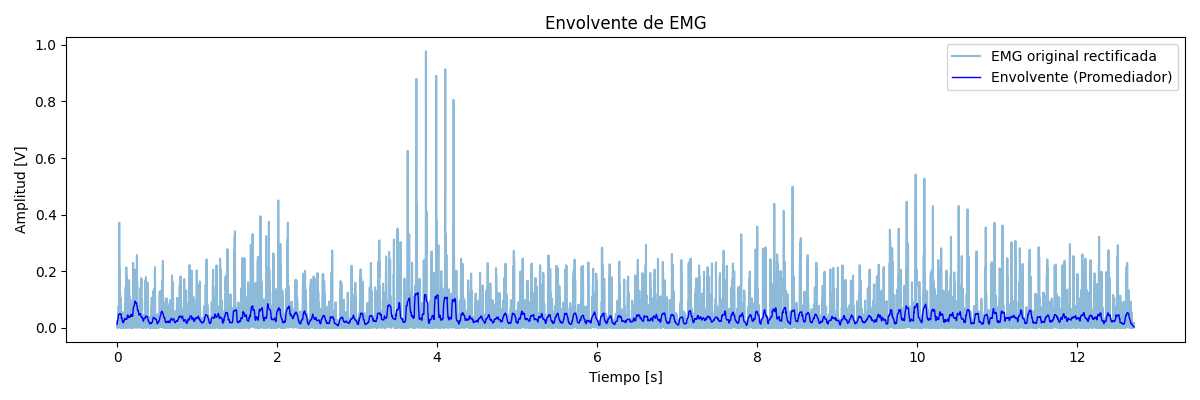
   
##### Envolvente LPF
El segundo método estima la envolvente por medio de la implementación de un filtro pasa bajos digital sobre la señal previamente rectificada. Esta técnica es de común uso en análisis de EMG pues permite suavizar en forma eficaz la señal sin alterar la morfología original. A diferencia del método de ARV móvil, en esta técnica puede regularse con precisión la frecuencia de corte, lo que permite decidir el nivel de suavidad de la envolvente. 
1. Rectificar la señal (restar la media y tomar valor absoluto).
2. Aplicar un filtro pasabajos Butterworth.

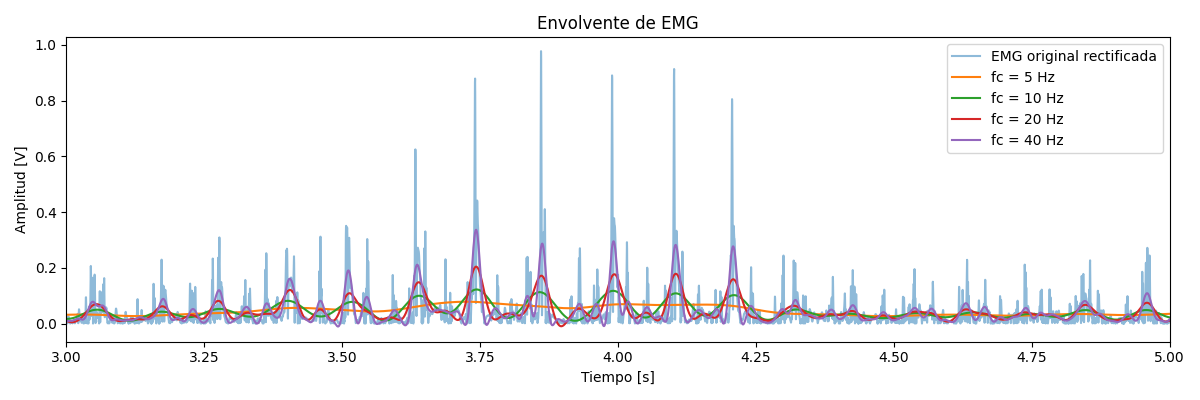

##### Envolvente por RMS móvil

Este método produce una estimación de la magnitud de la energía local de la señal, si bien tiene un costo computacional mayor, su sensibilidad a picos intensos es mayor. El procedimiento consiste en:
1. Obtener el cuadrado de la señal rectificada. 
2. Promediar los valores en una ventana móvil de un cierto ancho.
3. Tomar la raíz cuadrada del resultado.
Este procedimiento puede interpretarse como la aplicación de un filtro FIR deslizante de media móvil sobre la señal elevada al cuadrado. A diferencia de aplicar directamente un filtro prmediador, este procedimiento refleja la magnitud muscular a lo largo del tiempo en forma más adecuada en lugar de simplemente suavizar su forma.

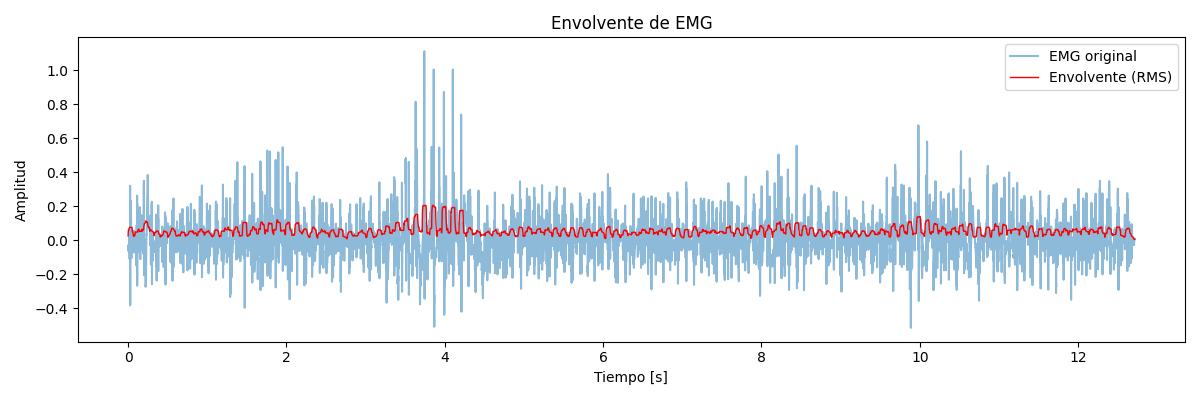

Los tres métodos implementados son ampliamente utilziados en procesamiento de señales de EMG. La media móvil es una ténica simple y de bajo costo computacional, es adecuada para monitoreos rápidos o sistemas con recursos limitados. En cuanto al filtro pasa bajos, la envolvente que se produce es suave y sigue la morfología original, en consecuencia, es altamente recomendable para análisis de sincronización y activación. Por último, el método de RMS móvil proporciona una medida energética de señal lo cual resulta útil para discriminar densidad de actividad muscular. A lo largo del trabajo se utilizarán el método de RMS y del filtrado pasabajos, regulando la fc según el requerimiento.

#### 2.2.3 Resumen y Diagrama

La exploración de diversas técnicas de procesamiento de señales permitió desarrollar un pipeline adaptable. Para este caso, en donde el objetivo es analizar diversos métodos de análisis y caracterizar las tres señales de EMG, se procedió mediante las etapas detalladas en el siguiente diagrama:



Sin embargo, las técnicas analizadas presentan tanto ventajas como limitaciones y deben seleccionarse según el propósito de investigación. Para este caso, se eligieron técnicas robustas y que priorizan la fidelidad morfológica, no obstante, en casos donde se requiere procesar grandes volúmenes de datos en tiempo real, puede ser preferible optar por los métodos más simples y de menor costo computacional. 





### 2.3 Caracterización temporal
Tras realizar un preprocesamiento completo de las señales de EMG, incluyendo filtrado, rectificación y estimación de la envolvente por distintos métodos, se procedió con un análisis comparativo temporal de las señales bajo estudio.

#### 2.3.1 Normalización 
Para realizar comparaciones válidas entre diferentes sujetos y condiciones, es habitual realizar una normalización de la señal. Esto permite compensar diferencias (como masa muscular, ubicación de electrodos y nivel de esfuerzo), para lograr interpretación relativa de la activación muscular. 

Para normalizar las señales, es común representar la señal total como porcentajes relativos a la máxima contracción voluntaria (MVC) documentada para cada sujeto en ese grupo muscular. Este tipo de normalización es ampliamente utilizada pues la señal de EMG varía entre personas, entre músculos e incluso entre sesiones, pues debende de la colocación de electrodos, piel, fatiga, etc. La normalización permite comparar señales entre distintos sujetos o distintas condiciones y evita comparaciones injustas. Sin embargo, para llevar a cabo esta técnica de normalización, debe obtenerse información cuidadosamente obtenida de la MVC de cada sujeto en condiciones controladas. 

Ante la falta de documentación sobre la MVC, se implementaron diversas formas de normalización para facilitar la comparación justa entre las señales bajo estudio.

#### 2.3.2 Inspección cualitativa

Se aplicó el pipeline detallado anteriormente sobre las tres señales para llevar a cabo una primer comparación cualitativa.

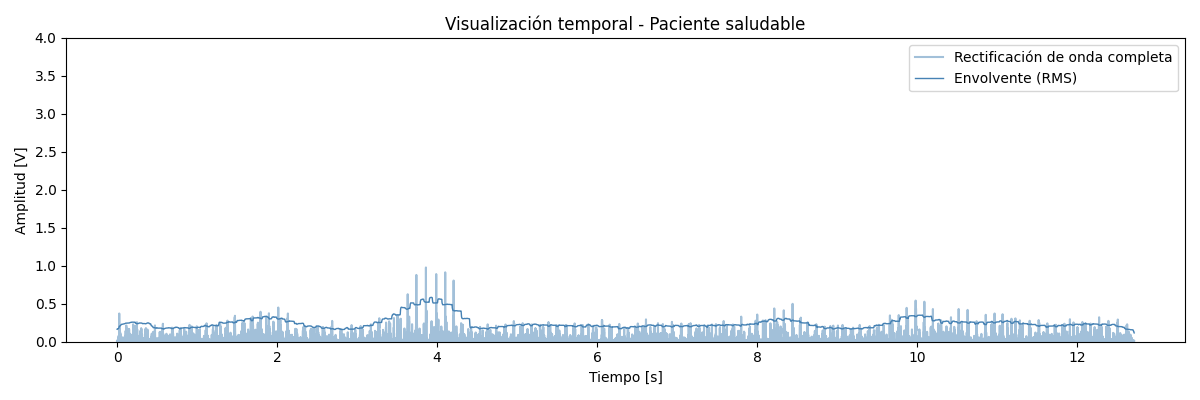
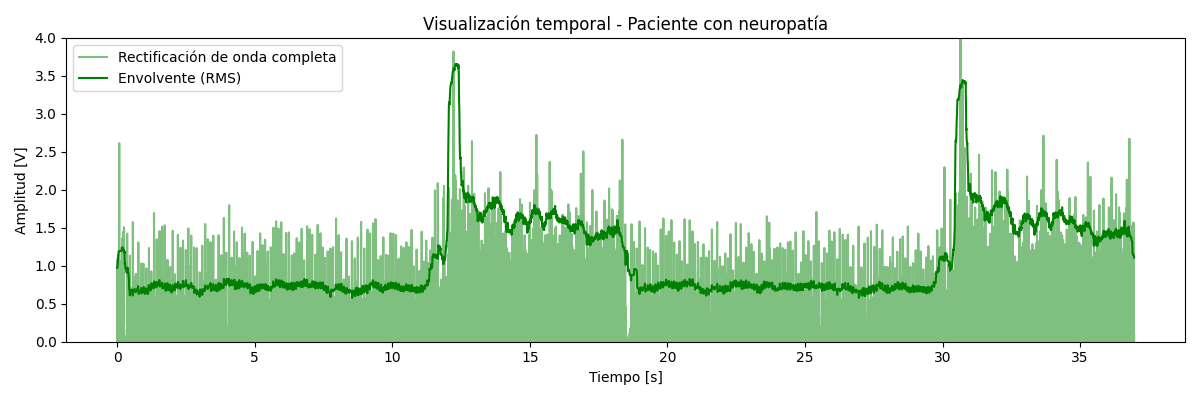
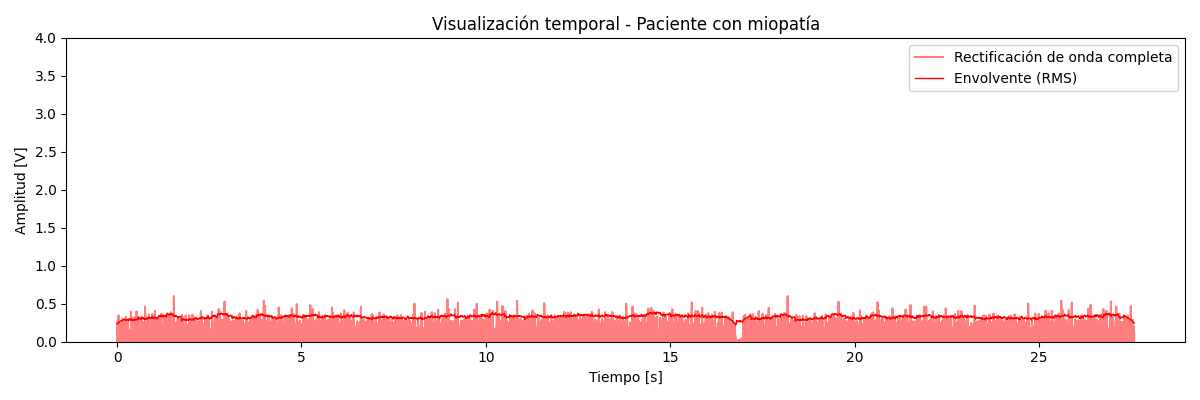

La visualización temporal de las señales permite comparar directamente el comportamiento para cada una de las patologías. Como se logra apreciar, la amplitud global para el paciente con neuropatía es cuatro veces mayor, lo cual es esperable debido a la hipertrofía compensatoria. En cuanto al paciente con miopatía, la amplitud es mucho menor y resulta dificil identificar periodos de contracción y relajación. Para el caso de la señal saludable, se logra identificar claramente un periodo de mayor actividad muscular entre los 3 y 4,2 segundos, por lo que se identifica esta región como región de contracción intensa, pasados los 4,2 segundos, comienza el periodo de relajación. En cuanto al paciente con neuropatía, la actividad muscular intensa se produce entre los 11 y 18 segundos, luego comienza la relajación. Cabe destacar, que para la señal de neuropatía se identifica un periodo de actividad alta hacia el final de la señal, lo que sugiere que se produjo una contracción muscular involuntaria.

#### 2.3.3 Anlálisis cuantitativo temporal

##### Métricas generales

Para obtener los datos cuantitativos de las señales bajo estudio, se realizó una división en 3 regiones de interés. La primer región corresponde al intervalo de tiempo durante el cual el paciente realiza fuerza, el segundo intervalo es un subsegmento dentro del primero que comprende la actividad más intensa, el periodo final comprende la relajación muscular. Para las señales del paciente saludable y del paciente con neuropatía, se establecieron los segmentos por inspección visual. En cuanto a la señal de miopatía, no fue posible relaizar el análisis directamente debido a la morfología de la señal, cuya amplitud es tan baja que no permite discriminar entre periodo de contracción y relajación. 

Para lograr el análisis de la señal de miopatía, se implementó el método de densidad de *turns*, que calcula cambios de dirección de la señal usando una ventana deslizante. Para aplicar el método, se calcularon las diferencias entre muestras consecutivas y se obtuvieron sus signos para así detectar cada cambio designo como un giro o turn. Luego se compararon los cambios de signo con un umbral mínimo establecido para discriminar turns inválidos. Esto se realizó sobre el largo total de la señal en ventanas de duración fija. Mediante este método, se identificó el periodo de contracción en base a la densidad de giros, pues durante la contracción se incrementa el número de unidades motoras activas y su frecuencia de disparo, lo cual genera un mayor número de giros.

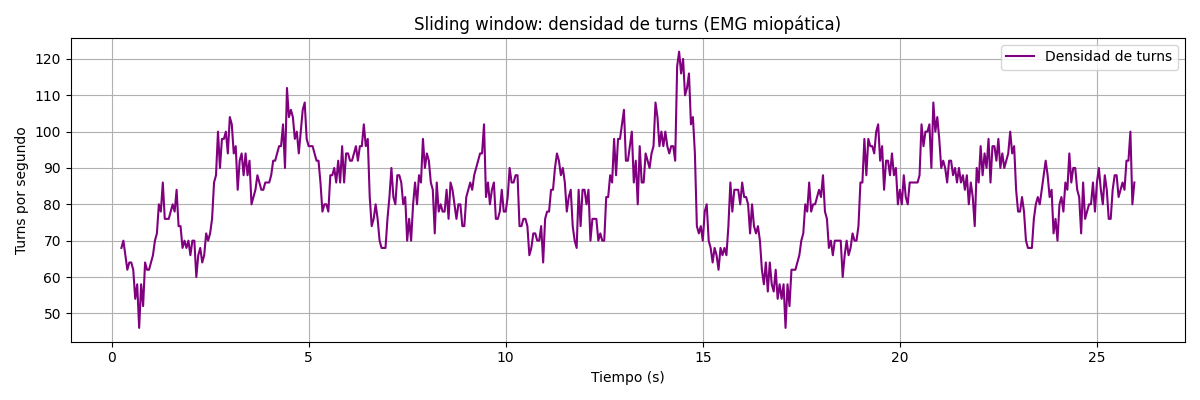

La imagen permite decidir que el periodo de contracción abarca desde el inicio hasta el segundo 15, dentro del cual se puede identificar que la máxima contracción se produce desde el segundo 12,5. Luego del segundo 15 comienza la relajación.

Habiendo identificado las zonas de interés en la señal de miopatía, se calcularon métricas anteriores sobre las regiones de contracción leve, contracción fuerte y relajación. 

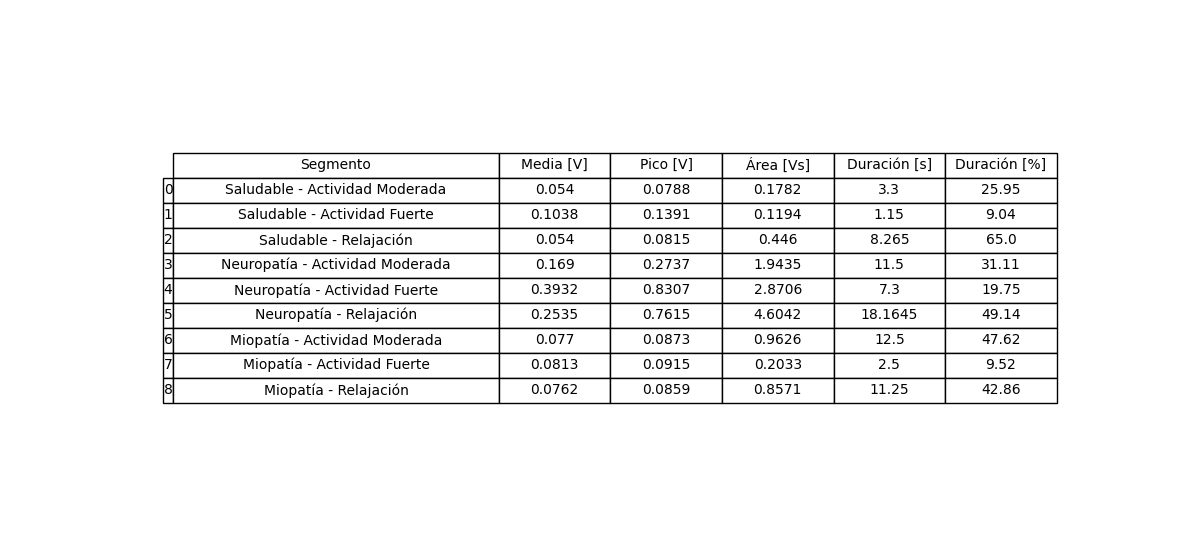

En cuanto a la señal con neuropatía, se observó una amplitud y duración mayor del periodo de contracción, lo cual es esperable para este tipo de patologías. El periodo de actividad fuerte constituyó un 20% de la duración total de la señal. Asimismo, se observó que la amplitud media del periodo de relajación tuvo una mayor amplitud que el periodo de contracción moderada, esto se debe a la actividad espontánea presente durante la relajación. 
Para la señal obtenida del paciente con miopatía, se obtuvieron amplitudes bajas y duraciones cortas, lo cual es esperable para esta condición. 

##### NUBE Turn-Amplitude

En análisis temporal de EMG, es comúm el método de *turns*, que analiza las señales sin necesidad de detectar potenciales individuales ni hacer descomposición. Para analizar los turns en una señal, se divide la señal en segmentos cortos, sobre los cuales se cuenta el número de turns, la amplitud entre pares de turns consecutivos y su amplitud promedio. Esta ténica produce un punto por segmento, donde sus coordenadas representan el número de turns  y su amplitud promedio, resultando en una nube TA (Turn-Amplitude). Esta técnica permite describir la complejidad y fuerza de la señal sin necesidad de descomponer la señal en sus MUAPs, haciéndola una opción robusta, rápida y objetiva para analizar EMG.

En el eje horizontal, se observa la cantidad de turns por cada segmento (250 ms). Un mayor número de turns sugiere una señal más compleja, es decir, mayor reclutamiento de unidades motoras. En cuanto al eje horizontal, este revela la amplitud promedio entre turns consecutivas, a mayor valor, mayor voltaje, esto sugiere contracciones más fuertes o potenciales más grandes.

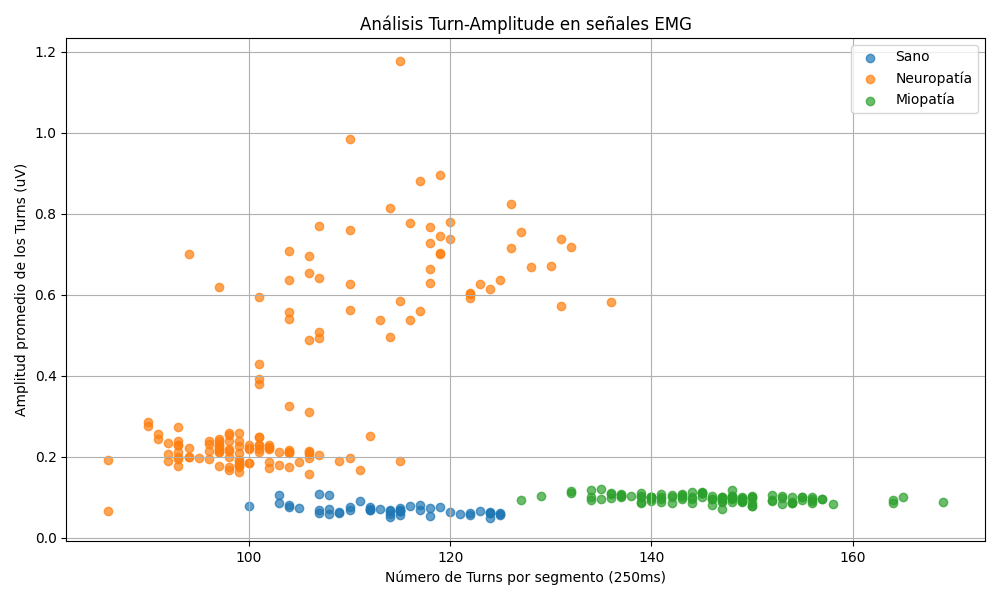

Como era de esperarse, se observaron valores concentradosen la zona de abajo a la derecha para la señal con miopatía, lo que sugiere muchas fibras pequeñas activas, un alto número de turns pero de baja amplitud. Para el caso de la señal del sujeto con neuropatía, se obtuvo una nube concentrada en la parte superior izquierda, con amplitudes altas pero menor número de turns, esto es esperable ya que hay pocas unidades motoras pero de mayor tamaño.

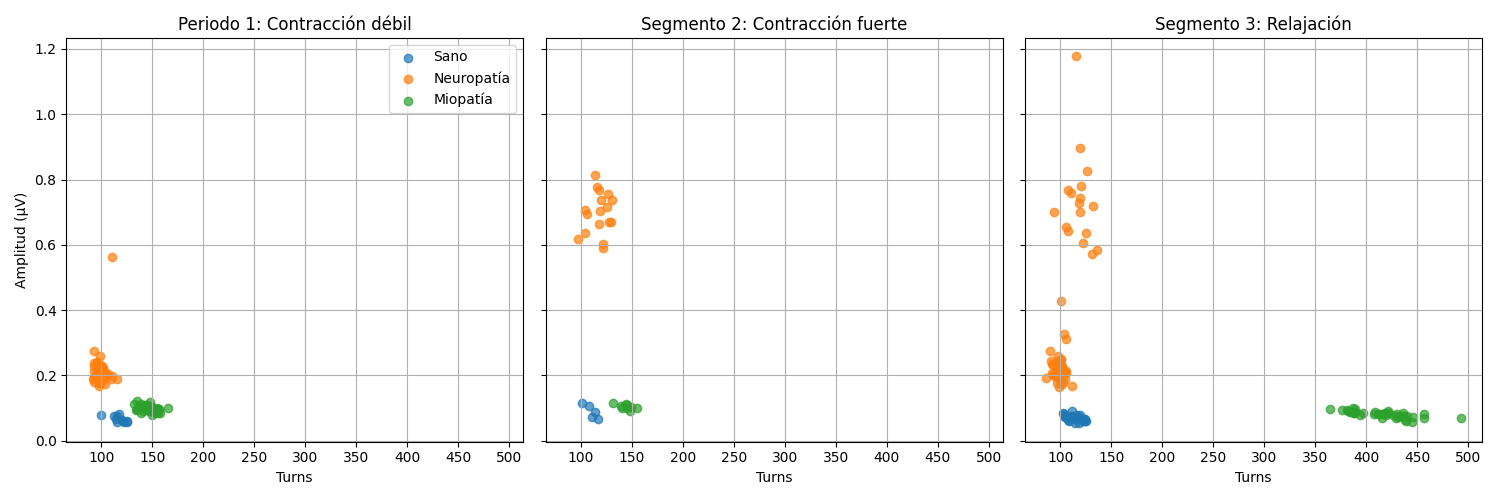

Para enriquecer el análisis, se extrajeron segmentos de interés y se repitió el procedimiento sobre estos. Para el paciente con neuropatía, se observó una amplitud mayor, que alcanzó valores muy elevados en el periodo de contracción fuerte y final. El número de turns fue inicialmente bajo, creció e el periodo de contracción fuerte y disminutó nuevamente en el periodo final. Esto sugiere un aumento del reclutamiento durante la contracción. Cabe destacar que los valores elevados de turns y amplitud en el segmento de reljación se atribuyen a la contracción involuntaria que suele darse en pacientes con esta patología. 
Para el paciente sano, el número de turns se mantuvo constante. En cuanto a la amplitud, creció ligeramente durante la contracción fuerte y luego bajó. Por último, el paciente con miopatía mantuvo una aplitud baja, aunque ligeramente mayor en los periodos de contracción débil y fuerte. En cuanto al número de turns, este incrementó drásticamente durante la relajación.

### 2.4 Análisis espectral
Se exploraron diversas técnicas para identificar las diferencias en el espectro de las tres señales bajo análisis.
#### 2.4.1 Análisis Cualitativo Espectral

##### Periodograma con ventana Hamming
El método de periodograma permite estimar la densidad espectral de potencia a través de la transformada de Fourier. Consiste en obtener la transformada de Fourier de una señal y a partir de ella estimar la PSD tomando por fundamento el teorema de Parseval. El truncamiento de la secuencia temporal equivale a realizar un producto con una ventana temporal de valor unitario constante, esto introduce ambigüedades en su representación en el dominio espectral. Dicha ambigüedad puede ser mitigada incrmentando la longitud de la ventana o eligiendo una ventana de forma apropiada. 
Para implementar este método, se utilizó la ventana Hamming, que ofrece un buen balance entre ancho de lóbulo principal y atenuación de lóbulos secundarios. Lo que implica buena resolución y poca varianza.

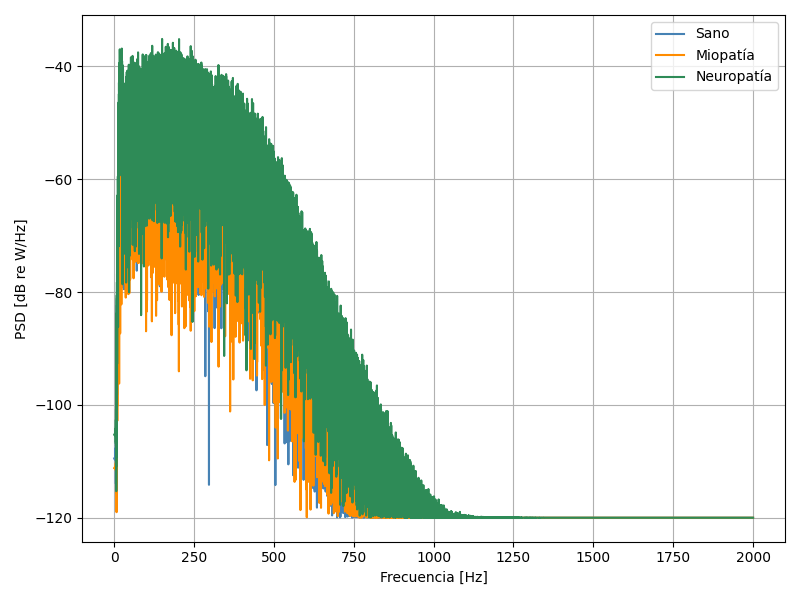

Como se logra apreciar, el periodograma permite observar la distribución de la energía en frecuencia. No obstante, se observa una alta varianza que no permite discriminar claramente entre los espectros de las señales bajo estudio.


##### PSD por Multitaper (Thompson)
Para mitigar la varianza y mejorar la visualización de la PSD, se implementó otro método de estimación de PSD, el método Multitaper. Esta técnica promedia múltiples periodogramas calculados multiplicando la señal por K tapers DPSS (ventanas ortogonales) que se diseñan para lograr una mayor concentración de energía. En comparación a la estimación de PSD con una única ventana, esta técnica reduce la varianza y el leakage.
En este caso, se decidió aplicar el método sobre intervalos según la actividad:

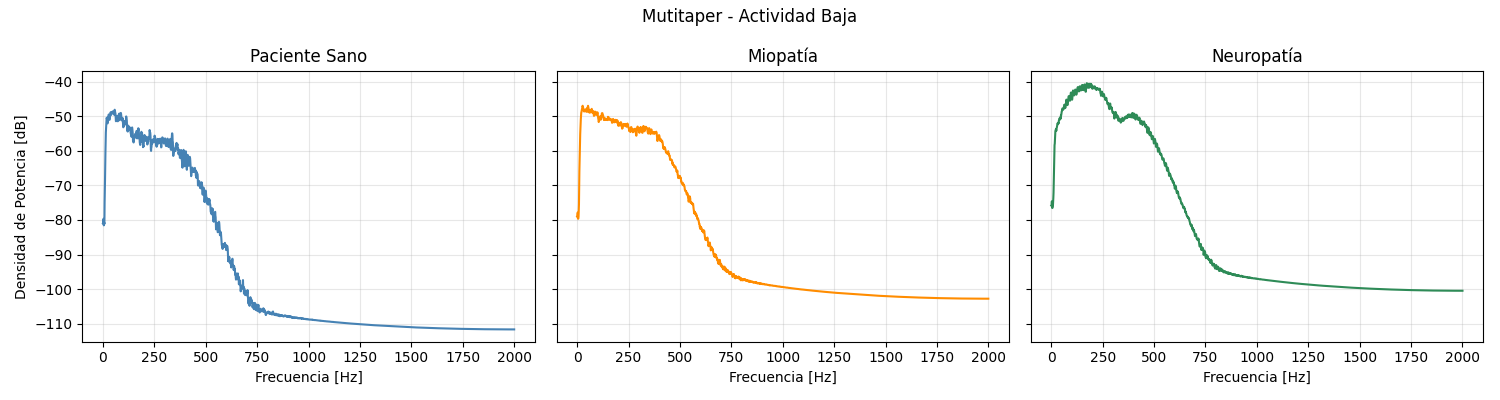
    
En primer lugar, se estimó la PSD utilizando el método descripto sobre el primer intervalo de cada señal, que corresponde al periodo en el cual el paciente contrae voluntariamente de forma leve. Para el paciente sano, se observa un pico pronunciado entre 100-250 Hz, seguido de un descenso paulatino hasta 500-700Hz. Este comportamiento es esperable y refleja potenciales de unidad motora normales con buena velocidad de conducción.
En cuanto el paciente con miopatía, se observa un espectro concentrado en frecuencias inferiores a 300 Hz, el espectro se mantiene entre 100 y 200 Hz y cae abruptamente, casi no hay contenido por encima de 500 Hz. Si bien en potenciales individuales la frecuencia es alta debido a su corta duración, lo cierto es que en la señal compuesta, (que es resultado de la superposición de múltiples unidades motoras de baja amplitud y poco sincronizadas), se observa un espectro concentrado en bajas frecuencias, reflejando un promedio temporal lento. 
En el paciente con neuropatía se observa un claro pico dominante alrededor de 150-200 Hz y una segunda elevación en frecuencias más bajas, este patrón, denominado bimodal es típico en sincronización anómala de grandes unidades motoras, que generan potenciales prolongados y de alta amplitud.

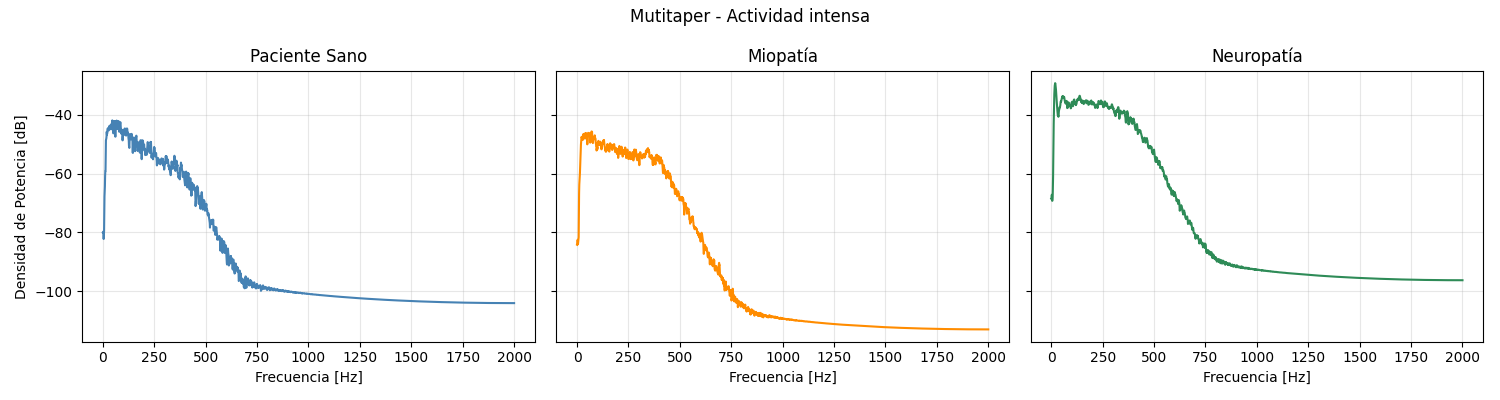

En segundo lugar, se estimó la PSD sobre el intervalo de actividad intensa de cada señal. 
Para el paciete sano se observa un un descenso homogéneo entre 20 y 500 Hz, seguido de un descenso más empinado entre 500 y 700 Hz. Además, se observa un espectro un ooici más ancho, llegando a frecuencias más altas antes de decaer. Asimismo, se observa una potencia mayor, lo que denota reclutamiento casi completo.
Para el paciente con miopatía, se observa una forma de onda muy similar, sin aumento notorio en la potencia. Es decir que el esfuerzo del paciente no logra ampliar la potencia total ni el contenido de alta frecuencia, lo que coincide con la condición del paciente.
En canto al paciente con neuropatía, se ve un aumento en la potencia global, con predominio de energía en las frecuencias bajas. Dado que no se observa una migración del pico hacia frecuencias altas, se puede concluir que al aumentar la fuerza, no se producen aumentos uniformes de conducción, sino una mayor sincronización de unidades motoras grandes.

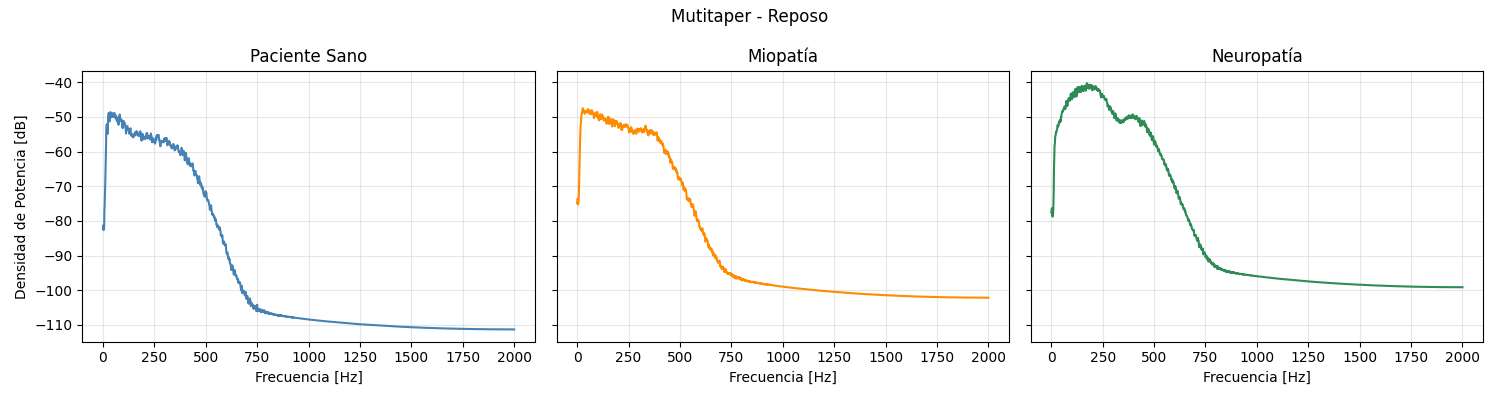

El tercer intervalo estudiado fue el correspondiente a la actividad muscular registrada en reposo.
Para el primer paciente, (saludable) se observa un espectro casi idéntico al de actividad pasiva. 
El paciente con miopatía
Por último, e paciente con neuropatía muestra un espectro con energía notablemente mayor, psoiblemente debido a...

En comparación el periodograma con ventana, el método Multitaper ofrece una estimación de PSD más fácil de intepretar debido a la notable mejoría en la varianza de las curvas, lo que permite analizar los espectros en los intervalos de interés y discriminar las características presentes en diferentes patologías. Cabe aclarar que en ambos casos se partió de las señales filtradas con un filtro pasabanda (20-450 Hz) digital Butterworth de orden 4, que concentró la energía en la banda fisiológica de EMG. Sin embargo, el periodograma resultó útil para observar la forma general del espectro y permite comparar la energía en forma rudimentaria, lo cual puede resultar de interés en casos en donde se desee realizar un análisis de general de grandes bases de datos con un bajo costo computacional.

##### Métricas sobre PSD
Para respaldar el análisis cualitativo, se obtuvieron métricas de interés en el espectro. A partir de las curvas de densidad espectral de potencia estimadas mediante el método Multitaper.
En primer lugar, se obtuvo la energía total, la energía del espectro a través de una integración numérica utilizando la función np.trapezoid, que permite estimar la potencia total.
A continuación, se determinó la frecuencia de percentil 95 %, que revela el rango en donde se concentra el 95 % de la energía total.
A su vez, se obtuvieron la frecuencia media, que representa un promedio ponderado de frecuencia por potencia y la frecuencia mediana, que divide la potencia acumulada en dos mitades iguales.
Nuevamente, el estudio se realizó por intervalos (actividad leve, intensa y reposo) ya que pemite comparar según el nivel de activación muscular.

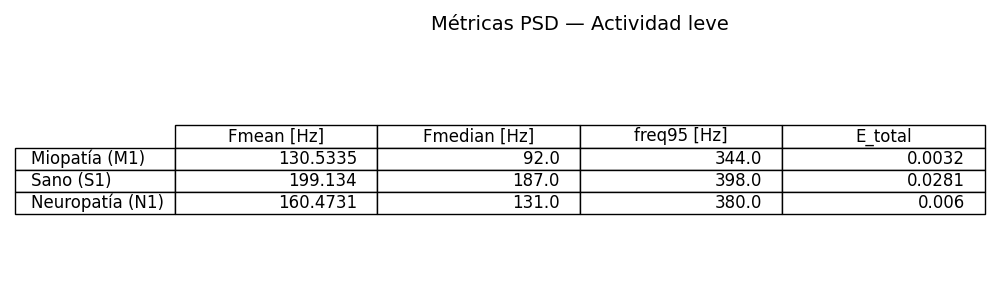

El primer intervalo de interés corresponde al periodo de actividad leve. 

Como se logra apreciar, se observa en la figura, el paciente sano presenta una frecuencia media mayor de alrededor de 199 Hz y una mediana de 187 Hz, estos valores son esperables ya que los potenciales de unidad motora tienen duración corta y velocidad de conducción alta, la energía se concentra entre 100 y 400 Hz,lo que coincide con la estimación del ancho de banda obtenida mediante el percentil 95%, que fue de 398 Hz. En cuanto a la energía total, el valor obtenido fue mucho más elevado a los pacientes con patología, lo cual es esperable ya que un paciente saludable tiene mejor y mayor reclutamiento.
En cuanto cuanto al paciente con miopatía, tanto la media como la mediana son notoriamente inferiores, con valores de 130 Hz y 92 Hz respectivamente, en cuanto al ancho de banda, el espectro se concentra en frecuencias más bajas (freq95 = 344 Hz), y la energía total fue de 0,0032, representando el menor valor de los tres. Este comportamiento es esperable ya que los MUAPs en pacientes con miopatías son más pequeños y presentan menor sincronía. La pérdida de fibras musculares reduce la potencia global y desplaza la distribución del espectro a frecuencias inferiores.
En cuanto al paciente con neuropatía, los valores de media y mediana se encontraron entre los valores del paciente sano y con miopatía, siendo estos 160 Hz y 131 Hz respectivamente. La energía, de 0,006 fue intermedia y el ancho de banda de 380 Hz fue más cercano al del paciente sano. Las métricas obtenidas son esperables para neuropatías con reinervación, en donde los MUAPs son grandes pero lentos, se observa una fusión de frecuencias bajas atribuidas a la asincronía y frecuencias medias debido a las fibras reinervadas.

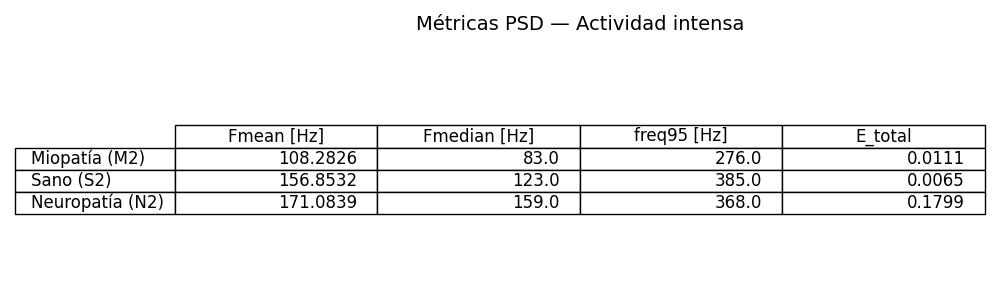

En el periodo de contracción intensa, el sujeto sano presentó una media de 157 Hz y una mediana de 123 Hz, con un ancho de banda de 385 Hz. En cuanto a la energía total, esta se duplicó respecto al periodo de actividad leve, alcanzandose un valor de 0,0065. 

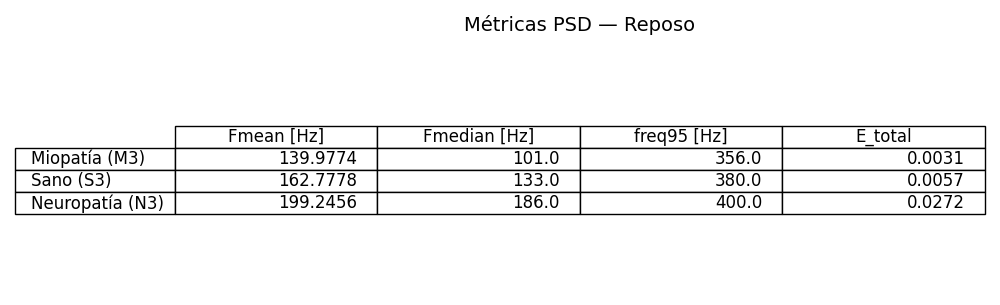






## 3. Discusión

## 4. Conclusiones

El trabajo realizado permitió explorar diversas técnicas de análisis y discriminación de señales de electromiograma. 

## 5. Bibliografía
[1] Raez MB, Hussain MS, Mohd-Yasin F. Techniques of EMG signal analysis: detection, processing, classification and applications. Biol Proced Online. 2006;8:11-35. doi: 10.1251/bpo115. Epub 2006 Mar 23. Erratum in: Biol Proced Online. 2006;8:163. doi: 10.1251/bpo124. PMID: 16799694; PMCID: PMC1455479.

[2] De Luca, C. J. (2002). Surface Electromyography: Detection and Recording. Delsys Inc.

[3] Esposito, D., Centracchio, J., Bifulco, P. et al. A smart approach to EMG envelope extraction and powerful denoising for human–machine interfaces. Sci Rep 13, 7768 (2023). https://doi.org/10.1038/s41598-023-33319-4

[4] Erik Stålberg, Hans van Dijk, Björn Falck, Jun Kimura, Christoph Neuwirth, Matthew Pitt, Simon Podnar, Devon I. Rubin, Seward Rutkove, Donald B. Sanders, Masahiro Sonoo, Hatice Tankisi, Machiel Zwarts, Standards for quantification of EMG and neurography, Clinical Neurophysiology, Volume 130, Issue 9, 2019, Pages 1688-1729, ISSN 1388-2457, https://doi.org/10.1016/j.clinph.2019.05.008.

[5] Nazmi, N.; Abdul Rahman, M.A.; Yamamoto, S.-I.; Ahmad, S.A.; Zamzuri, H.; Mazlan, S.A. A Review of Classification Techniques of EMG Signals during Isotonic and Isometric Contractions. Sensors 2016, 16, 1304. https://doi.org/10.3390/s16081304

[6] Prerau MJ, Bianchi MT, Brown RE, Ellenbogen JM, Patrick PL. Sleep Neurophysiological Dynamics Through the Lens of Multitaper Spectral Analysis. Physiology (Bethesda). 2017 Jan;32(1):60-92. Review. doi: 10.1152/physiol.00062.2015 PubMed PMID: 27927806.
